In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import netCDF4 as nc
import numpy as np
import re
import datetime
from matplotlib.ticker import FixedLocator
from matplotlib.backends.backend_pdf import PdfPages
import mpld3
#mpld3.enable_notebook()
import site
import importlib
import os
import matplotlib.gridspec as gridspecb
from struct import *

In [2]:
# read in MODIS land cover
lc_key = ['sparsely-vegetated','semi-arid','tundra & arctic-shrubland','grassland & cropland', \
        'tropical forest','extra-tropical forest']
lcfilename = '/OSM/CBR/OA_GLOBALCABLE/work/CABLE-CCAM/ccam_100km.199912.modis_biome.nc'
f = nc.Dataset(lcfilename)
lc_index = np.squeeze(f.variables['climate_biome'][:,:])
cplant2 = np.squeeze(f.variables['cplant2'][:,:])
lat = f.variables['lat'][:]
lon = f.variables['lon'][:]

In [3]:
var_list = f.variables
for var in var_list:
    print ('Name:',var)

Name: lon
Name: lat
Name: lev
Name: depth
Name: time
Name: climate_gmd
Name: climate_alpha20
Name: anth_elecgas_ave
Name: w
Name: eg
Name: fg
Name: he
Name: pr
Name: ps
Name: rh
Name: rs
Name: ta
Name: td
Name: ts
Name: ua
Name: va
Name: zg
Name: alb
Name: bci
Name: bco
Name: clh
Name: cll
Name: clm
Name: clt
Name: cor
Name: dms
Name: hus
Name: lai
Name: map
Name: oci
Name: oco
Name: prc
Name: prw
Name: psl
Name: qfg
Name: qlg
Name: sic
Name: snc
Name: snd
Name: snm
Name: snw
Name: so2
Name: so4
Name: tas
Name: uas
Name: vas
Name: epan
Name: evap
Name: grid
Name: grpl
Name: hfls
Name: hfss
Name: hurs
Name: huss
Name: mrro
Name: mrso
Name: orog
Name: prsn
Name: qbot
Name: rlds
Name: rlus
Name: rlut
Name: rnet
Name: rsds
Name: rsdt
Name: rsus
Name: rsut
Name: sund
Name: tauu
Name: tauv
Name: tbot
Name: tgg1
Name: tgg2
Name: tgg3
Name: tgg4
Name: tgg5
Name: tgg6
Name: tpan
Name: tsea
Name: ubot
Name: vbot
Name: vegt
Name: zmla
Name: cfrac
Name: clivi
Name: clwvi
Name: dpsdt
Name: dust1
Na

In [4]:
lats = np.fliplr(np.repeat(lat[:,np.newaxis],720,axis=1))
lons = np.repeat(lon[np.newaxis,:],360,axis=0)

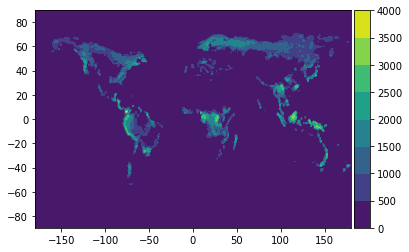

In [42]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
ax = plt.subplot(111)
im = plt.contourf(lons,lats,cplant2)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

In [134]:
years = np.arange(1980, 2000)
months = np.arange(12) +1

In [93]:
# get time series of biomass ,aggregated by land-cover class
file_path = '/flush3/rya17a/casacn/raijin/avg/'
file_stem = 'ccam_100km.'
count = 0
#time_vec = np.zeros(len(years)*len(months))
time_vec = np.array([])
for i in years:
    for j in months:
        file_name  = file_path + file_stem + str(i) + str(j).zfill(2) + '.nc'
        #print(file_name)
        f = nc.Dataset(file_name)
        time_vec = np.append(time_vec, (f.variables['time'][:]))
        count = count + 1

/flush3/rya17a/casacn/raijin/avg/ccam_100km.198001.nc
/flush3/rya17a/casacn/raijin/avg/ccam_100km.198002.nc
/flush3/rya17a/casacn/raijin/avg/ccam_100km.198003.nc
/flush3/rya17a/casacn/raijin/avg/ccam_100km.198004.nc
/flush3/rya17a/casacn/raijin/avg/ccam_100km.198005.nc
/flush3/rya17a/casacn/raijin/avg/ccam_100km.198006.nc
/flush3/rya17a/casacn/raijin/avg/ccam_100km.198007.nc
/flush3/rya17a/casacn/raijin/avg/ccam_100km.198008.nc
/flush3/rya17a/casacn/raijin/avg/ccam_100km.198009.nc
/flush3/rya17a/casacn/raijin/avg/ccam_100km.198010.nc
/flush3/rya17a/casacn/raijin/avg/ccam_100km.198011.nc
/flush3/rya17a/casacn/raijin/avg/ccam_100km.198012.nc
/flush3/rya17a/casacn/raijin/avg/ccam_100km.198101.nc
/flush3/rya17a/casacn/raijin/avg/ccam_100km.198102.nc
/flush3/rya17a/casacn/raijin/avg/ccam_100km.198103.nc
/flush3/rya17a/casacn/raijin/avg/ccam_100km.198104.nc
/flush3/rya17a/casacn/raijin/avg/ccam_100km.198105.nc
/flush3/rya17a/casacn/raijin/avg/ccam_100km.198106.nc
/flush3/rya17a/casacn/raijin

/flush3/rya17a/casacn/raijin/avg/ccam_100km.199210.nc
/flush3/rya17a/casacn/raijin/avg/ccam_100km.199211.nc
/flush3/rya17a/casacn/raijin/avg/ccam_100km.199212.nc
/flush3/rya17a/casacn/raijin/avg/ccam_100km.199301.nc
/flush3/rya17a/casacn/raijin/avg/ccam_100km.199302.nc
/flush3/rya17a/casacn/raijin/avg/ccam_100km.199303.nc
/flush3/rya17a/casacn/raijin/avg/ccam_100km.199304.nc
/flush3/rya17a/casacn/raijin/avg/ccam_100km.199305.nc
/flush3/rya17a/casacn/raijin/avg/ccam_100km.199306.nc
/flush3/rya17a/casacn/raijin/avg/ccam_100km.199307.nc
/flush3/rya17a/casacn/raijin/avg/ccam_100km.199308.nc
/flush3/rya17a/casacn/raijin/avg/ccam_100km.199309.nc
/flush3/rya17a/casacn/raijin/avg/ccam_100km.199310.nc
/flush3/rya17a/casacn/raijin/avg/ccam_100km.199311.nc
/flush3/rya17a/casacn/raijin/avg/ccam_100km.199312.nc
/flush3/rya17a/casacn/raijin/avg/ccam_100km.199401.nc
/flush3/rya17a/casacn/raijin/avg/ccam_100km.199402.nc
/flush3/rya17a/casacn/raijin/avg/ccam_100km.199403.nc
/flush3/rya17a/casacn/raijin

In [6]:
# read land-cover map (1deg resolution)
lcfilename1 = '/OSM/CBR/OA_GLOBALCABLE/work/CABLE-CCAM/biome_MODIS_LC_1deg.nc'
f1 = nc.Dataset(lcfilename1)
lc1_index = np.squeeze(f1.variables['climate_biome'][:,:].filled(fill_value = 0))
lat1 = f1.variables['latitude'][:]
lon1 = f1.variables['longitude'][:]
lats1 = np.fliplr(np.repeat(lat1[:,np.newaxis],360,axis=1))
lons1 = np.repeat(lon1[np.newaxis,:],150,axis=0)
lc1_vec = np.reshape(lc1_index,[150*360])
lats1_vec = np.reshape(lats1,[150*360])
lons1_vec = np.reshape(lons1,[150*360])

In [11]:
lc1_index.shape
lat1.shape
len(lc1_vec[lc1_vec>0])
print(lats1.shape)
lats1_vec[0]

(150, 360)


89.5

In [8]:
# create vector of indices relating the position in the collapsed vector to the position in the full array of grid-cells
file_name = '/OSM/CBR/OA_GLOBALCABLE/work/CABLE-CCAM/plume_out_cable_zero.nc'
f1 = nc.Dataset(file_name)
local_lat = f1.variables['local_lat'][:]
local_lon = f1.variables['local_lon'][:]
I1=list()
for i in np.arange(len(local_lat)):
        I1.append((np.where((lats1_vec==local_lat[i]) & (lons1_vec==local_lon[i] ))))

In [36]:
for index, x in enumerate(np.nditer(lc1_vec, op_flags = ['readwrite'])):
    lc1_vec[index] = np.int(x)

In [85]:
lc1_vec_reduced=np.array([])
lc1_vec_reduced = np.squeeze(lc1_vec[I1])
np.unique(lc1_vec_reduced)

array([0., 1., 2., 3., 4., 5., 6.], dtype=float32)

In [160]:
lc1_mat = np.array([])
lc1_mat = lc1_vec.reshape([150,360])
np.unique(lc1_mat)

array([0., 1., 2., 3., 4., 5., 6.], dtype=float32)

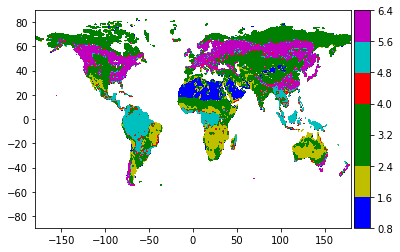

In [165]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors
cmap = colors.ListedColormap(['b','y','g','r','c','m'])
ax = plt.subplot(111)
#im = plt.contourf(lons1,lats1,lc1_mat, 7, cmap=cmap)
im = plt.contourf(lons,lats,lc_index, 6, cmap=cmap)
#im = plt.contourf(lons1,lats1,lons1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

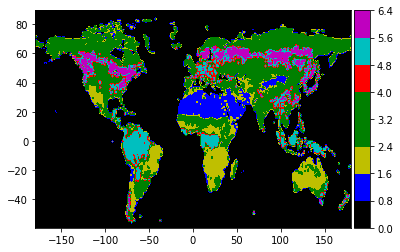

In [164]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors
cmap = colors.ListedColormap(['k','b','y','g','r','c','m'])
ax = plt.subplot(111)
im = plt.contourf(lons1,lats1,lc1_mat, 7, cmap=cmap)
#im = plt.contourf(lons,lats,lc_index, 7, cmap=cmap)
#im = plt.contourf(lons1,lats1,lons1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

In [68]:
# read patchfrac from netcdf file
file_name = '/OSM/CBR/OA_GLOBALCABLE/work/CABLE-CCAM/plume_out_cable_zero.nc'
f1 = nc.Dataset(file_name)
patchfrac = f1.variables['patchfrac'][:,:].filled(fill_value = 0)
patchfrac = np.repeat(patchfrac[np.newaxis,:,:],f1.variables['time'].size,axis=0)
patchfrac.shape

(240, 3, 15069)

In [145]:
vars = ['GPP', 'Evap', 'LAI','TotLivBiomass','SWE','LeafResp','Tair']
for v in vars:
    mystring = v + '=f1.variables["' + v + '"][:,:].filled(fill_value = 0)'
    exec(mystring)
    mystring = v + 'tot = np.sum(patchfrac*' + v + ',1)'
    exec(mystring)
    print(mystring)
    mystring = v + '_vec1 = np.zeros([6,240])'
    exec(mystring)
    for l in (np.arange(6)+1):
            mystring = v + '_vec1[l-1,:] = ' + v + 'tot[:,lc1_vec_reduced==l ].mean(axis=1)'
            print(mystring)
            exec(mystring)

GPPtot = np.sum(patchfrac*GPP,1)
GPP_vec1[l-1,:] = GPPtot[:,lc1_vec_reduced==l ].mean(axis=1)
GPP_vec1[l-1,:] = GPPtot[:,lc1_vec_reduced==l ].mean(axis=1)
GPP_vec1[l-1,:] = GPPtot[:,lc1_vec_reduced==l ].mean(axis=1)
GPP_vec1[l-1,:] = GPPtot[:,lc1_vec_reduced==l ].mean(axis=1)
GPP_vec1[l-1,:] = GPPtot[:,lc1_vec_reduced==l ].mean(axis=1)
GPP_vec1[l-1,:] = GPPtot[:,lc1_vec_reduced==l ].mean(axis=1)
Evaptot = np.sum(patchfrac*Evap,1)
Evap_vec1[l-1,:] = Evaptot[:,lc1_vec_reduced==l ].mean(axis=1)
Evap_vec1[l-1,:] = Evaptot[:,lc1_vec_reduced==l ].mean(axis=1)
Evap_vec1[l-1,:] = Evaptot[:,lc1_vec_reduced==l ].mean(axis=1)
Evap_vec1[l-1,:] = Evaptot[:,lc1_vec_reduced==l ].mean(axis=1)
Evap_vec1[l-1,:] = Evaptot[:,lc1_vec_reduced==l ].mean(axis=1)
Evap_vec1[l-1,:] = Evaptot[:,lc1_vec_reduced==l ].mean(axis=1)
LAItot = np.sum(patchfrac*LAI,1)
LAI_vec1[l-1,:] = LAItot[:,lc1_vec_reduced==l ].mean(axis=1)
LAI_vec1[l-1,:] = LAItot[:,lc1_vec_reduced==l ].mean(axis=1)
LAI_vec1[l-1,:] = LAItot[:,lc1_ve

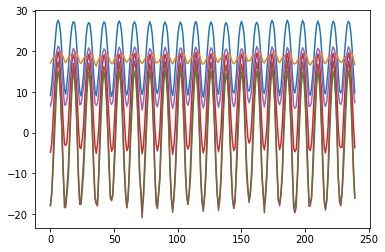

In [150]:
plt.plot(Tair_vec1.transpose()-273.15)

In [151]:
biomass_vec1 = TotLivBiomass_vec1.transpose()*1000
lai_vec1 = LAI_vec1.transpose()
evap_vec1 = Evap_vec1.transpose()*24*3600
snw_vec1 = SWE_vec1.transpose()
fpn_vec1 = (GPP_vec1.transpose() - LeafResp_vec1.transpose())*12.0 * 1e-6 * 3600 * 24
tas_vec1 = Tair_vec1.transpose() - 273.15

In [132]:
site_lat = [-35.57, 61.85]
site_lon = [148.15, 24.29]
site_lat = [ 61.85]
site_lon = [24.29]
Ilat = np.argmin(abs(lat-site_lat), axis=0)
Ilon = np.argmin(abs(lon-site_lon), axis=0)
print(lats[Ilat,Ilon])
print(lons[Ilat,Ilon])

61.75
24.25


In [138]:
file_path = '/flush3/rya17a/casacn/raijin/avg/'
file_stem = 'ccam_100km.'
count = 0
#time_vec = np.zeros(len(years)*len(months))
biomass_vec = np.array([])
lai_vec = np.array([])
evap_vec = np.array([])
snd_vec = np.array([])
snw_vec = np.array([])
fpn_vec = np.array([])
for i in years:
    for j in months:
        file_name  = file_path + file_stem + str(i) + str(j).zfill(2) + '.nc'
        #print(file_name)
        f = nc.Dataset(file_name)
        biomass_vec = np.append(biomass_vec, (f.variables['cplant2'][0,Ilat,Ilon]))
        lai_vec = np.append(lai_vec, (f.variables['lai'][0,Ilat,Ilon]))
        evap_vec = np.append(evap_vec, (f.variables['evap'][0,Ilat,Ilon]))
        snd_vec = np.append(snd_vec, (f.variables['snd'][0,Ilat,Ilon]))
        snw_vec = np.append(snw_vec, (f.variables['snw'][0,Ilat,Ilon]))
        fpn_vec = np.append(fpn_vec, (f.variables['fpn_ave'][0,Ilat,Ilon]))
        count = count + 1

In [152]:
file_path = '/flush3/rya17a/casacn/raijin/avg/'
file_stem = 'ccam_100km.'
count = 0
biomass_vec = np.zeros((240,6))
lai_vec = np.zeros((240,6))
evap_vec = np.zeros((240,6))
snd_vec = np.zeros((240,6))
snw_vec = np.zeros((240,6))
fpn_vec = np.zeros((240,6))
tas_vec = np.zeros((240,6))
for i in years:
    for j in months:
        file_name  = file_path + file_stem + str(i) + str(j).zfill(2) + '.nc'
        f = nc.Dataset(file_name)
        for l in (np.arange(6)+1):
            biomass_vec[count,l-1] = (f.variables['cplant1'][0,:,:])[lc_index==l].mean() + \
                                     (f.variables['cplant2'][0,:,:])[lc_index==l].mean() + \
                                     (f.variables['cplant3'][0,:,:])[lc_index==l].mean()
            lai_vec[count,l-1] =  (f.variables['lai'][0,:,:])[lc_index==l].mean()
            evap_vec[count,l-1] = (f.variables['evap'][0,:,:])[lc_index==l].mean()*8.0  # mm/d
            snd_vec[count,l-1] = (f.variables['snd'][0,:,:])[lc_index==l].mean()
            snw_vec[count,l-1] = (f.variables['snw'][0,:,:])[lc_index==l].mean()
            fpn_vec[count,l-1] = (f.variables['fpn_ave'][0,:,:])[lc_index==l].mean()*-1.0*24.*3600.  # g C/m-2/d-1
            tas_vec[count,l-1] = (f.variables['tas'][0,:,:])[lc_index==l].mean() - 273.15
        count = count + 1

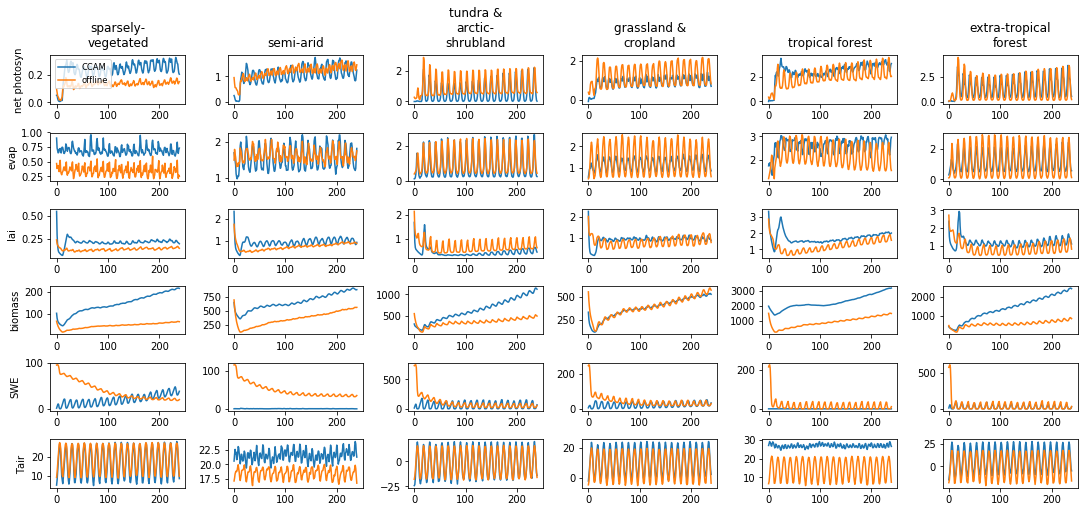

In [153]:
from textwrap import wrap
vars=['fpn_vec','evap_vec','lai_vec','biomass_vec','snw_vec', 'tas_vec']
varlabels = ['net photosyn', 'evap', 'lai', 'biomass','SWE','Tair']
fig=plt.figure(figsize=(15, 7),constrained_layout=True)
ncols = 6
nrows = 6
sindex=[]
x = np.arange(7)
gs = fig.add_gridspec(ncols=ncols, nrows=nrows)
[sindex.append((j,i)) for i in range(ncols) for j in range(nrows)]
index = 0
for index2, l in enumerate(lc_key):
    for index1, v in enumerate(vars):
        ax = fig.add_subplot(gs[sindex[index]])
        mystring = 'y =' + v +  '[:,index2]'
        exec(mystring)
        plt.plot(y, label='CCAM')
        mystring = 'y =' + v +  '1[:,index2]'
        exec(mystring)
        plt.plot(y, label='offline')
        if (index1==0):
            title = ax.set_title("\n".join(wrap(l, 15)))
            #fig.tight_layout()
            title.set_y(1.05)
            #fig.subplots_adjust(top=0.8)
            #plt.title(l)
        if (index2==0):    
            ax.set_ylabel(varlabels[index1])
        index = index + 1
        if ((index2==0) and (index1==0)):
            plt.legend(fontsize='small',frameon=True,loc=2)

In [183]:
plot_dir = '/OSM/CBR/OA_GLOBALCABLE/work/CABLE-CCAM/'
plot_fname = 'CCAM-CABLE-checks.pdf'
fig.savefig(os.path.join(plot_dir, plot_fname), bbox_inches='tight',
                    pad_inches=0.1)

In [7]:
bafile = '/OSM/CBR/OA_GLOBALCABLE/work/BIOS3_forcing/simfire_monthly_ba.nc'
f = nc.Dataset(bafile)
lat = f.variables['latitude'][:]
lon = f.variables['longitude'][:]
ba_monthly = f.variables['monthly_ba'][:]
lats = np.fliplr(np.repeat(lat[:,np.newaxis],720,axis=1))
lons = np.repeat(lon[np.newaxis,:],360,axis=0)

In [5]:
ba_monthly.shape

(360, 720, 12)

In [6]:
lat.shape

(360,)

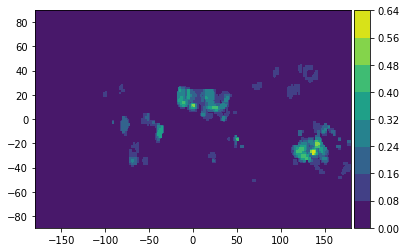

In [10]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
ax = plt.subplot(111)
im = plt.contourf(lons,lats,np.squeeze(ba_monthly[:,:,10]))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

In [11]:
site_lat = [-12.5]
site_lon = [131.15]
Ilat = np.argmin(abs(lat-site_lat), axis=0)
Ilon = np.argmin(abs(lon-site_lon), axis=0)
print(lats[Ilat,Ilon])
print(lons[Ilat,Ilon])

-12.75
131.25


In [14]:
ba_monthly[Ilat, Ilon, :]

array([1.28000e-04, 2.10000e-05, 1.07000e-04, 2.47940e-02, 1.37241e-01,
       1.86391e-01, 1.86289e-01, 2.34046e-01, 1.37104e-01, 7.97940e-02,
       1.12240e-02, 2.86200e-03], dtype=float32)

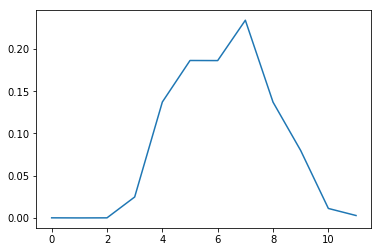

In [16]:
plt.plot(ba_monthly[Ilat, Ilon, :])